In [8]:
import polars as pl
import seaborn as sns
import glob
import matplotlib.pyplot as plt

In [4]:
results_df = pl.DataFrame(
    schema={
        'Model': pl.String,
        'Eval_Task': pl.String,
        "Dataset": pl.String,
        "MRR": pl.Float64,
        "P@3": pl.Float64,
        "Time_Tot": pl.Float64,
        "Time_Query": pl.Float64,
        "Error_Count": pl.Int32
    })
results_df

Model,Eval_Task,Dataset,MRR,P@3,Time_Tot,Time_Query,Error_Count
str,str,str,f64,f64,f64,f64,i32


In [6]:
for pn in glob.glob("../../../data/results/NER/*"):
    result_df = pl.read_parquet(pn)
    results_df = results_df.vstack(result_df)

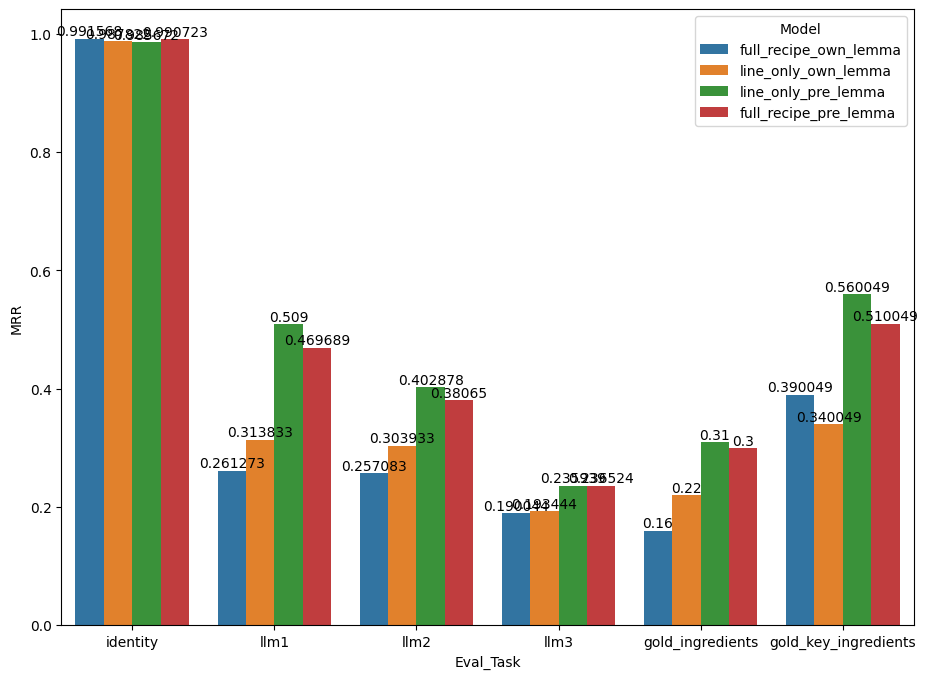

In [9]:
plt.figure(figsize=(11,8))
ax = sns.barplot(results_df, x='Eval_Task', y='MRR', hue='Model')

for cont in ax.containers:
    ax.bar_label(cont)

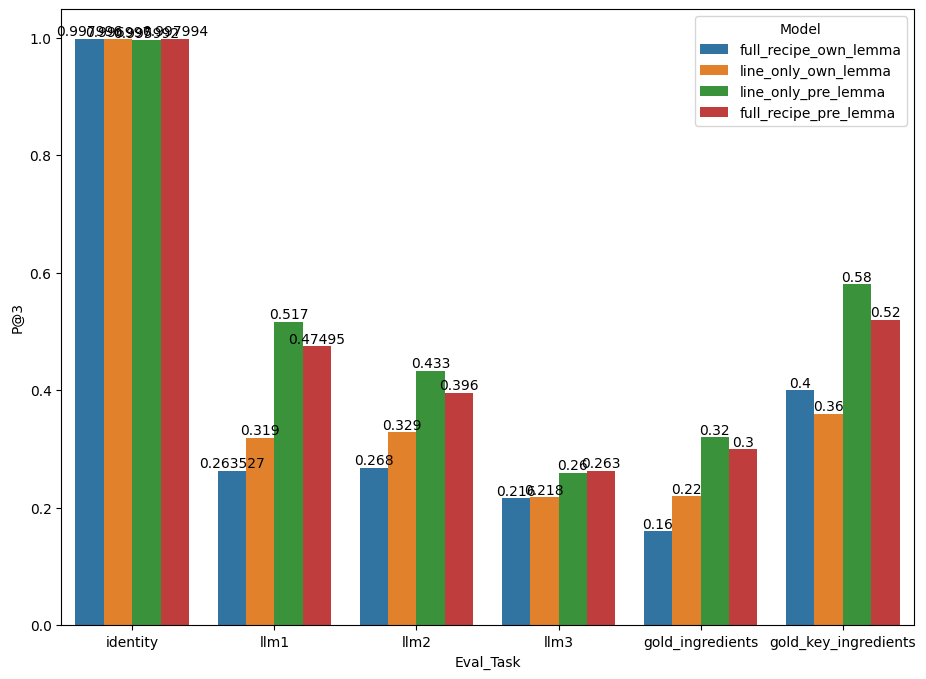

In [10]:
plt.figure(figsize=(11,8))
ax = sns.barplot(results_df, x='Eval_Task', y='P@3', hue='Model')

for cont in ax.containers:
    ax.bar_label(cont)

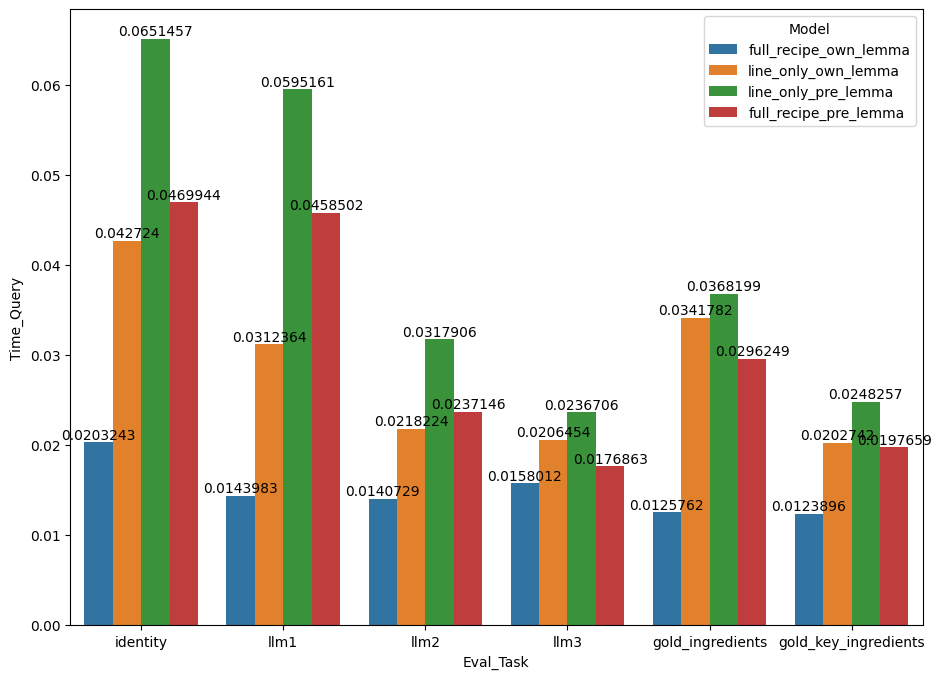

In [11]:
plt.figure(figsize=(11,8))
ax = sns.barplot(results_df, x='Eval_Task', y='Time_Query', hue='Model')

for cont in ax.containers:
    ax.bar_label(cont)